In [1]:
import pandas as pd
df = pd.read_csv("carPrice.csv")
df.head()

car_ID  symboling   carCompany fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [3]:
! pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=cb67d097583df6b31203b1d8780549e5ab0f3ca92991d01808557e2b843786de
  Stored in directory: c:\users\prayag\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [6]:
! pip install matplotlib


In [7]:
! pip install seaborn

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# All the significant variables identified from the model #

df1 = df[['price','symboling','carheight','compressionratio','doornumber','fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'carlength','carwidth', 'enginelocation', 'fuelsystem','peakrpm','citympg','highwaympg','stroke']]
df1.head()
df1.shape

(205, 24)

In [4]:
# Converting only the categorical into numerical type

x_dummies  = pd.get_dummies(df1,drop_first=True)
x_dummies.head()

price  symboling  carheight  compressionratio  wheelbase  curbweight  \
0  13495.0          3       48.8               9.0       88.6        2548   
1  16500.0          3       48.8               9.0       88.6        2548   
2  16500.0          1       52.4               9.0       94.5        2823   
3  13950.0          2       54.3              10.0       99.8        2337   
4  17450.0          2       54.3               8.0       99.4        2824   

   enginesize  boreratio  horsepower  carlength  ...  cylindernumber_twelve  \
0         130       3.47         111      168.8  ...                      0   
1         130       3.47         111      168.8  ...                      0   
2         152       2.68         154      171.2  ...                      0   
3         109       3.19         102      176.6  ...                      0   
4         136       3.19         115      176.6  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 44 columns]

In [5]:
# checking the relation between the dependent & independenmt variables with correlation plot #

corrmat = x_dummies.corr()
corrmat

price  symboling  carheight  compressionratio  \
price                  1.000000  -0.079978   0.119336          0.067984   
symboling             -0.079978   1.000000  -0.541038         -0.178515   
carheight              0.119336  -0.541038   1.000000          0.261214   
compressionratio       0.067984  -0.178515   0.261214          1.000000   
wheelbase              0.577816  -0.531954   0.589435          0.249786   
curbweight             0.835305  -0.227691   0.295572          0.151362   
enginesize             0.874145  -0.105790   0.067149          0.028971   
boreratio              0.553173  -0.130051   0.171071          0.005197   
horsepower             0.808139   0.070873  -0.108802         -0.204326   
carlength              0.682920  -0.357612   0.491029          0.158414   
carwidth               0.759325  -0.232919   0.279210          0.181129   
peakrpm               -0.085267   0.273606  -0.320411         -0.435741   
citympg               -0.685751  -0.035823  -0.048640          0.324701   
highwaympg            -0.697599   0.034606  -0.107358          0.265201   
stroke                 0.079443  -0.008735  -0.055307          0.186110   
doornumber_two        -0.031835   0.664073  -0.552208         -0.177888   
fueltype_gas          -0.105679   0.194311  -0.284631         -0.984356   
aspiration_turbo       0.177926  -0.059866   0.087311          0.295541   
carbody_hardtop        0.225854   0.168845  -0.072328          0.029623   
carbody_hatchback     -0.262039   0.435648  -0.477476         -0.202650   
carbody_sedan          0.125716  -0.378341   0.235863          0.188286   
carbody_wagon         -0.042310  -0.298243   0.459148          0.016315   
drivewheel_fwd        -0.601950   0.102839  -0.100273         -0.062683   
drivewheel_rwd         0.638957  -0.076381   0.039814          0.105185   
enginetype_dohcv       0.159225   0.009347  -0.092628         -0.002519   
enginetype_l           0.042267  -0.133979   0.319687          0.219153   
enginetype_ohc        -0.344270  -0.082855   0.036260          0.027545   
enginetype_ohcf        0.016285   0.037513  -0.046670         -0.084328   
enginetype_ohcv        0.385991  -0.013597  -0.065063         -0.086649   
enginetype_rotor      -0.004544   0.245950  -0.238720         -0.026436   
cylindernumber_five    0.249606  -0.090188   0.152982          0.173360   
cylindernumber_four   -0.697762  -0.034161   0.059696         -0.012522   
cylindernumber_six     0.474978  -0.000238  -0.049777         -0.065559   
cylindernumber_three  -0.071388   0.065707  -0.015076         -0.011354   
cylindernumber_twelve  0.199634  -0.047012  -0.170181          0.023986   
cylindernumber_two    -0.004544   0.245950  -0.238720         -0.026436   
enginelocation_rear    0.324973   0.212471  -0.106234         -0.019762   
fuelsystem_2bbl       -0.501374  -0.034069  -0.079418         -0.183384   
fuelsystem_4bbl       -0.017306   0.212471  -0.206225         -0.022838   
fuelsystem_idi         0.105679  -0.194311   0.284631          0.984356   
fuelsystem_mfi        -0.002747   0.122067  -0.101245         -0.055528   
fuelsystem_mpfi        0.517075   0.012532   0.108685         -0.311035   
fuelsystem_spdi       -0.061475   0.181939  -0.278615         -0.153726   
fuelsystem_spfi       -0.019580   0.065707  -0.066778         -0.016654   

                       wheelbase  curbweight  enginesize  boreratio  \
price                   0.577816    0.835305    0.874145   0.553173   
symboling              -0.531954   -0.227691   -0.105790  -0.130051   
carheight               0.589435    0.295572    0.067149   0.171071   
compressionratio        0.249786    0.151362    0.028971   0.005197   
wheelbase               1.000000    0.776386    0.569329   0.488750   
curbweight              0.776386    1.000000    0.850594   0.648480   
enginesize              0.569329    0.850594    1.000000   0.583774   
boreratio               0.488750    0.648480    0.583774   1.000000   
horsepower 

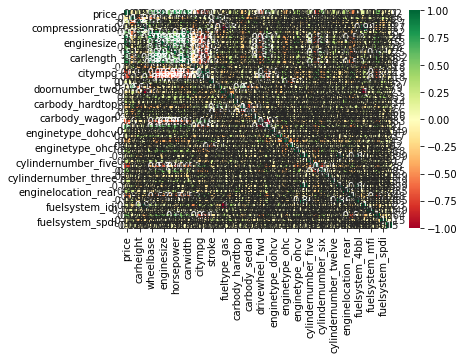

In [12]:
g = sns.heatmap(x_dummies[corrmat.index].corr(),annot=True,cmap='RdYlGn')

In [14]:
! pip install statsmodels

In [16]:
# Splitting the data into dependent and independent variables #

x_dummies.head()

price  symboling  carheight  compressionratio  wheelbase  curbweight  \
0  13495.0          3       48.8               9.0       88.6        2548   
1  16500.0          3       48.8               9.0       88.6        2548   
2  16500.0          1       52.4               9.0       94.5        2823   
3  13950.0          2       54.3              10.0       99.8        2337   
4  17450.0          2       54.3               8.0       99.4        2824   

   enginesize  boreratio  horsepower  carlength  ...  cylindernumber_twelve  \
0         130       3.47         111      168.8  ...                      0   
1         130       3.47         111      168.8  ...                      0   
2         152       2.68         154      171.2  ...                      0   
3         109       3.19         102      176.6  ...                      0   
4         136       3.19         115      176.6  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 44 columns]

In [6]:
X = x_dummies.iloc[:,1:]
X.head()

symboling  carheight  compressionratio  wheelbase  curbweight  enginesize  \
0          3       48.8               9.0       88.6        2548         130   
1          3       48.8               9.0       88.6        2548         130   
2          1       52.4               9.0       94.5        2823         152   
3          2       54.3              10.0       99.8        2337         109   
4          2       54.3               8.0       99.4        2824         136   

   boreratio  horsepower  carlength  carwidth  ...  cylindernumber_twelve  \
0       3.47         111      168.8      64.1  ...                      0   
1       3.47         111      168.8      64.1  ...                      0   
2       2.68         154      171.2      65.5  ...                      0   
3       3.19         102      176.6      66.2  ...                      0   
4       3.19         115      176.6      66.4  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 43 columns]

In [7]:
Y = x_dummies.iloc[:,0]
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:

# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

c:\users\prayag\anaconda3\envs\carpriceprediction\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               features
0      3.729848              symboling
1      4.122954              carheight
2    184.331513       compressionratio
3     14.340698              wheelbase
4     33.675355             curbweight
5     49.505517             enginesize
6      7.910548              boreratio
7     32.769609             horsepower
8     15.284346              carlength
9     11.142078               carwidth
10     3.687826                peakrpm
11    39.271860                citympg
12    36.372517             highwaympg
13     3.372270                 stroke
14     3.583152         doornumber_two
15  8347.451461           fueltype_gas
16     4.924978       aspiration_turbo
17     3.014287        carbody_hardtop
18    14.277551      carbody_hatchback
19    18.755490          carbody_sedan
20     9.629068          carbody_wagon
21    11.155078         drivewheel_fwd
22    14.382330         drivewheel_rwd
23     4.501176       enginetype_dohcv
24     6.049283           enginetype_l
25     7.039164         enginetype_ohc
26     7.112689        enginetype_ohcf
27     3.920521        enginetype_ohcv
28          inf       enginetype_rotor
29    15.903954    cylindernumber_five
30    68.930818    cylindernumber_four
31    21.090323     cylindernumber_six
32     4.171206   cylindernumber_three
33     3.960215  cylindernumber_twelve
34          inf     cylindernumber_two
35     3.935689    enginelocation_rear
36     7.373726        fuelsystem_2bbl
37     4.714151        fuelsystem_4bbl
38  1129.943095         fuelsystem_idi
39     1.382385         fuelsystem_mfi
40    10.558518        fuelsystem_mpfi
41     3.401278        fuelsystem_spdi
42     1.296582        fuelsystem_spfi

In [9]:
# Deleting the highly corrleated variables #

M = X.drop(['compressionratio','citympg','highwaympg'],axis=1)
M.head()

symboling  carheight  wheelbase  curbweight  enginesize  boreratio  \
0          3       48.8       88.6        2548         130       3.47   
1          3       48.8       88.6        2548         130       3.47   
2          1       52.4       94.5        2823         152       2.68   
3          2       54.3       99.8        2337         109       3.19   
4          2       54.3       99.4        2824         136       3.19   

   horsepower  carlength  carwidth  peakrpm  ...  cylindernumber_twelve  \
0         111      168.8      64.1     5000  ...                      0   
1         111      168.8      64.1     5000  ...                      0   
2         154      171.2      65.5     5000  ...                      0   
3         102      176.6      66.2     5500  ...                      0   
4         115      176.6      66.4     5500  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 40 columns]

In [10]:
# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(M.values, i) for i in range(M.shape[1])]
vif["features"] = M.columns
vif

c:\users\prayag\anaconda3\envs\carpriceprediction\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               features
0      3.326985              symboling
1      4.075121              carheight
2     14.147737              wheelbase
3     31.468350             curbweight
4     46.808567             enginesize
5      7.757688              boreratio
6     30.089929             horsepower
7     14.238691              carlength
8     10.570296               carwidth
9      3.455143                peakrpm
10     3.307698                 stroke
11     3.482016         doornumber_two
12  7681.987598           fueltype_gas
13     4.425802       aspiration_turbo
14     2.889589        carbody_hardtop
15    13.957899      carbody_hatchback
16    18.126169          carbody_sedan
17     9.294229          carbody_wagon
18    10.638418         drivewheel_fwd
19    13.604800         drivewheel_rwd
20     3.982934       enginetype_dohcv
21     4.298735           enginetype_l
22     6.553836         enginetype_ohc
23     6.805047        enginetype_ohcf
24     3.830041        enginetype_ohcv
25          inf       enginetype_rotor
26    15.502735    cylindernumber_five
27    67.548736    cylindernumber_four
28    20.312778     cylindernumber_six
29     3.860602   cylindernumber_three
30     2.398394  cylindernumber_twelve
31          inf     cylindernumber_two
32     3.518954    enginelocation_rear
33     7.243503        fuelsystem_2bbl
34     4.641769        fuelsystem_4bbl
35   834.770204         fuelsystem_idi
36     1.330585         fuelsystem_mfi
37    10.321350        fuelsystem_mpfi
38     2.922162        fuelsystem_spdi
39     1.290546        fuelsystem_spfi

In [11]:
# Dropping the variabkle : Curbweight, as it is highly correlated #

# Deleting the highly corrleated variables #

M1= M.drop(['curbweight'],axis=1)
M1.head()

symboling  carheight  wheelbase  enginesize  boreratio  horsepower  \
0          3       48.8       88.6         130       3.47         111   
1          3       48.8       88.6         130       3.47         111   
2          1       52.4       94.5         152       2.68         154   
3          2       54.3       99.8         109       3.19         102   
4          2       54.3       99.4         136       3.19         115   

   carlength  carwidth  peakrpm  stroke  ...  cylindernumber_twelve  \
0      168.8      64.1     5000    2.68  ...                      0   
1      168.8      64.1     5000    2.68  ...                      0   
2      171.2      65.5     5000    3.47  ...                      0   
3      176.6      66.2     5500    3.40  ...                      0   
4      176.6      66.4     5500    3.40  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 39 columns]

In [12]:
# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(M1.values, i) for i in range(M1.shape[1])]
vif["features"] = M1.columns
vif

c:\users\prayag\anaconda3\envs\carpriceprediction\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               features
0      3.322616              symboling
1      4.045040              carheight
2     14.142541              wheelbase
3     37.604878             enginesize
4      7.689942              boreratio
5     29.620586             horsepower
6     12.171099              carlength
7     10.113711               carwidth
8      3.453745                peakrpm
9      3.278911                 stroke
10     3.420665         doornumber_two
11  7131.460249           fueltype_gas
12     4.275092       aspiration_turbo
13     2.637542        carbody_hardtop
14    13.161443      carbody_hatchback
15    16.683035          carbody_sedan
16     9.140105          carbody_wagon
17     8.870657         drivewheel_fwd
18    13.101507         drivewheel_rwd
19     3.959249       enginetype_dohcv
20     4.152548           enginetype_l
21     6.528150         enginetype_ohc
22     6.754178        enginetype_ohcf
23     3.818966        enginetype_ohcv
24          inf       enginetype_rotor
25    14.410600    cylindernumber_five
26    64.333111    cylindernumber_four
27    18.899421     cylindernumber_six
28     3.815264   cylindernumber_three
29     2.384783  cylindernumber_twelve
30          inf     cylindernumber_two
31     3.447505    enginelocation_rear
32     7.217786        fuelsystem_2bbl
33     4.641493        fuelsystem_4bbl
34   779.142249         fuelsystem_idi
35     1.327972         fuelsystem_mfi
36    10.313196        fuelsystem_mpfi
37     2.912626        fuelsystem_spdi
38     1.244219        fuelsystem_spfi

In [13]:
M2 = M1.drop(['enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor'],axis=1)
M2.head()

symboling  carheight  wheelbase  enginesize  boreratio  horsepower  \
0          3       48.8       88.6         130       3.47         111   
1          3       48.8       88.6         130       3.47         111   
2          1       52.4       94.5         152       2.68         154   
3          2       54.3       99.8         109       3.19         102   
4          2       54.3       99.4         136       3.19         115   

   carlength  carwidth  peakrpm  stroke  ...  cylindernumber_twelve  \
0      168.8      64.1     5000    2.68  ...                      0   
1      168.8      64.1     5000    2.68  ...                      0   
2      171.2      65.5     5000    3.47  ...                      0   
3      176.6      66.2     5500    3.40  ...                      0   
4      176.6      66.4     5500    3.40  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 33 columns]

In [14]:
# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(M2.values, i) for i in range(M2.shape[1])]
vif["features"] = M2.columns
vif

VIF Factor               features
0      2.969145              symboling
1      3.577295              carheight
2     11.395000              wheelbase
3     24.840735             enginesize
4      5.152841              boreratio
5     15.544082             horsepower
6     11.057423              carlength
7      9.154919               carwidth
8      3.050231                peakrpm
9      2.250236                 stroke
10     3.374681         doornumber_two
11  6296.775605           fueltype_gas
12     3.037294       aspiration_turbo
13     2.494576        carbody_hardtop
14    12.554749      carbody_hatchback
15    15.582863          carbody_sedan
16     8.463590          carbody_wagon
17     7.961822         drivewheel_fwd
18     9.763486         drivewheel_rwd
19     8.911072    cylindernumber_five
20    42.356318    cylindernumber_four
21    11.498486     cylindernumber_six
22     2.632031   cylindernumber_three
23     2.143860  cylindernumber_twelve
24    10.741735     cylindernumber_two
25     2.037111    enginelocation_rear
26     6.716423        fuelsystem_2bbl
27     4.539337        fuelsystem_4bbl
28   681.940114         fuelsystem_idi
29     1.307543         fuelsystem_mfi
30     9.466377        fuelsystem_mpfi
31     2.802712        fuelsystem_spdi
32     1.221088        fuelsystem_spfi

In [15]:
M2.shape

(205, 33)

In [41]:
df1['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [16]:
M2.columns

Index(['symboling', 'carheight', 'wheelbase', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'peakrpm', 'stroke',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginelocation_rear', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [31]:
M2['doornumber_two'].head()

0    1
1    1
2    1
3    0
4    0
Name: doornumber_two, dtype: uint8

In [38]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [41]:
#As there are lot of features, we can reduce the no. of features by using #PCA or 
# Or else we can also drop the features based on correlation values, highly correlated variables can be dropped #
#taking only the important featires based on their feature importance in predicting the target variable# -#ExtraTreesRegressor 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [43]:
model.fit(M2,Y)

TypeError: fit() missing 1 required positional argument: 'y'

In [46]:
Y.shape

(205,)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [44]:
# Splitting the data into train and test split #

X_train,X_test,Y_train,Y_test = train_test_split(M2,Y,test_size=0.15,random_state=20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(174, 33)
(174,)
(31, 33)
(31,)


In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
# Building the Linear Regression model using stats OLS method #

import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)

In [50]:
est = sm.OLS(Y_train,X_train1)  # sm.OLS  : Y,X
est1 = est.fit()
print(est1.summary())

#R2 score : 0.89

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     46.79
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           7.01e-60
Time:                        21:17:08   Log-Likelihood:                -1605.8
No. Observations:                 174   AIC:                             3276.
Df Residuals:                     142   BIC:                             3377.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.366e+

c:\users\prayag\anaconda3\envs\carpriceprediction\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [52]:
from math import sqrt

In [53]:
Y_pred_train = est1.predict(X_train1)

RMSE = sqrt(mean_squared_error(Y_pred_train,Y_train))
print(RMSE)

2465.3211588360723


In [54]:
X_test2 = sm.add_constant(X_test)

In [55]:
Y_pred = est1.predict(X_test2)
RMSE = sqrt(mean_squared_error(Y_pred,Y_test))
print(RMSE)

2242.223048956773


In [56]:
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [57]:
# Building a Decision Tree for Regression #

dtr = DecisionTreeRegressor(min_samples_leaf=12)
mo = dtr.fit(X_train,Y_train)
mo

r = mo.score(X_train,Y_train)
print(r)

0.9090885435659682


In [58]:
y_train_pred = mo.predict(X_train)

RMSE = sqrt(mean_squared_error(y_train_pred,Y_train))
print(RMSE)

2489.373518470004


In [59]:
y_test_pred = mo.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test_pred,Y_test))
print(RMSE)

# r score = 0.91,

# Error has reduced drastically after dropping the highly correlated variables

2407.7313825219126


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Building the random forest model for #

# Building the random forest regression on this model #

rf = RandomForestRegressor(max_depth=4,n_estimators=40)
mo = rf.fit(X_train,Y_train)
mo

RandomForestRegressor(max_depth=4, n_estimators=40)

In [62]:
y_train_pred = mo.predict(X_train)

RMSE = sqrt(mean_squared_error(y_train_pred,Y_train))
print(RMSE)

print(mo.score(X_train,Y_train))

1687.657290080193
0.9582162894544967


In [63]:
y_test_pred = mo.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test_pred,Y_test))
print(RMSE)

2066.85511615797


In [64]:
params = {'n_estimators' :[5,8,10,15,20,50,60,80,100],'max_features' : ['auto','sqrt'],
         'max_depth':[3,4,5,6,7,10,12],'max_leaf_nodes':[3,4,5,6,7],'min_samples_leaf':[4,5,6,8]}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rf = RandomForestRegressor()

In [67]:
model_rf = RandomizedSearchCV(rf,cv=10,param_distributions=params, scoring='neg_mean_squared_error',verbose=2,random_state=2,n_jobs=1,n_iter=10,)

In [68]:
# Fitting the model #

a = model_rf.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.1s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV] 

[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12, total=   0.1s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12, total=   0.1s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12, total=   0.2s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12, total=   0.1s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth=12, total=   0.1s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=4, max_features=sqrt, max_depth

[CV] n_estimators=20, min_samples_leaf=4, max_leaf_nodes=6, max_features=sqrt, max_depth=12 
[CV]  n_estimators=20, min_samples_leaf=4, max_leaf_nodes=6, max_features=sqrt, max_depth=12, total=   0.1s
[CV] n_estimators=20, min_samples_leaf=4, max_leaf_nodes=6, max_features=sqrt, max_depth=12 
[CV]  n_estimators=20, min_samples_leaf=4, max_leaf_nodes=6, max_features=sqrt, max_depth=12, total=   0.0s
[CV] n_estimators=20, min_samples_leaf=4, max_leaf_nodes=6, max_features=sqrt, max_depth=12 
[CV]  n_estimators=20, min_samples_leaf=4, max_leaf_nodes=6, max_features=sqrt, max_depth=12, total=   0.0s
[CV] n_estimators=80, min_samples_leaf=5, max_leaf_nodes=6, max_features=auto, max_depth=3 
[CV]  n_estimators=80, min_samples_leaf=5, max_leaf_nodes=6, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=80, min_samples_leaf=5, max_leaf_nodes=6, max_features=auto, max_depth=3 
[CV]  n_estimators=80, min_samples_leaf=5, max_leaf_nodes=6, max_features=auto, max_depth=3, total=   0.2s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.7s finished


In [69]:
# Best parameters #

a.best_params_ 

{'n_estimators': 60,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 7,
 'max_features': 'auto',
 'max_depth': 7}

In [70]:
a.best_estimator_

RandomForestRegressor(max_depth=7, max_leaf_nodes=7, min_samples_leaf=6,
                      n_estimators=60)

In [71]:
c = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=7,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
m = c.fit(X_train,Y_train)

In [73]:
m.score(X_train,Y_train)

# Explained variance in the model : 0.932

0.9327525366595388

In [74]:
# Preduction for te x_test data #

y_pred = model_rf.predict(X_test)

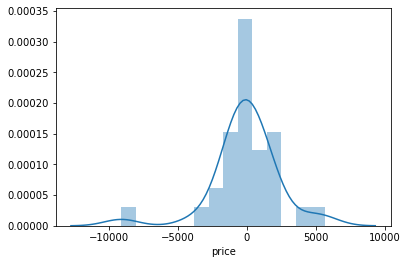

In [75]:
# Compare the performance of thes tested data #

sns.distplot(Y_test-y_pred)
# As the distribution follows a normal distributuon, hence we ccan say that difference for majority of obs. is equals to zero
# Hence the y_pred is alsmost equibaklent to y_test

In [76]:
y_pred_train = model_rf.predict(X_train)

In [77]:
# checking tghe RMSE for train and test #

# Checkong yhe MSE Error in the train data

RMSE = sqrt(mean_squared_error(y_pred_train,Y_train))
print(RMSE)

2196.293737642528


In [78]:
# checking tghe RMSE for train and test #

# Checkong yhe MSE Error in the train data

RMSE = sqrt(mean_squared_error(y_pred,Y_test))
print(RMSE)

2416.915518839318


In [79]:
# Appyling the grid search CV to check the performance od this model #

from sklearn.model_selection import GridSearchCV

In [80]:
model_gf = GridSearchCV(rf,cv=10,param_grid=params, scoring='neg_mean_squared_error',verbose=2,n_jobs=1)

In [81]:
mo_gr = model_gf.fit(X_train,Y_train)

Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_dep

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=20 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100, total=   0.5s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=100 
[C

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=15 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=15 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=80 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=10 
[CV]  max_

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=60 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_dep

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.3s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100 
[C

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_dept

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=60 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_dep

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100, total=   0.4s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15, total=   0.1s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=20 
[CV] 

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=100 


[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=15 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=80 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=15 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=80 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=15 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80, total=   0.3s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=80 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=10 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=80 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=10 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=60 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10 
[CV]  max_

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=60 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_dep

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=20 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=100 


[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=80 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  ma

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV] 

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=10 
[CV]  max_

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=60 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100 


[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.3s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=15 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=80 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=15 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=80 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=10 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=80 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=10 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=60 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=10 
[CV]  max_

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=60 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=10 
[CV]  max_dept

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=60 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV] 

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_e

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=10 
[CV]

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimator

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_e

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators

[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_e

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=80, total=   0.3s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=10 


[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=10 
[C

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=60, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=4, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=20, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=20, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators=50, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=8 
[CV] 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=20, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5, n_estimators=100, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=5 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=20, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_estimators=100, total=   0.3s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6, n_e

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=8, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=15, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=80 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators=80, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=10, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators=60, total=   0.2s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=6, n_estimators

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=8, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=10 
[CV]

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=50, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators=60, total=   0.1s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8, n_estimators

[Parallel(n_jobs=1)]: Done 25200 out of 25200 | elapsed: 42.9min finished


In [84]:
# Best parameters dfor the model #

print(mo_gr.best_params_)
print(mo_gr.best_estimator_)
print(mo_gr.best_score_)


{'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'n_estimators': 20}
RandomForestRegressor(max_depth=10, max_leaf_nodes=7, min_samples_leaf=4,
                      n_estimators=20)
-6327196.892234479


In [85]:
cm = RandomForestRegressor(max_depth=10, max_leaf_nodes=7, min_samples_leaf=4,
                      n_estimators=20)

In [86]:
e = cm.fit(X_train,Y_train)

In [87]:
e.score(X_train,Y_train)

# # Score of R2 Value : 93.63% shows the variance explained by this model #

0.9363763382788612

In [88]:
#Predicting the output fior x_test #

y_pred_train = model_gf.predict(X_train)

In [97]:
#Predicting the output fior x_test #

y_pred = model_gf.predict(X_test)

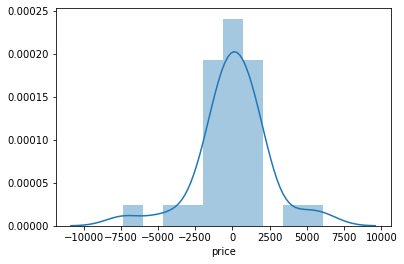

In [90]:
#Checking the performance of this model with helo of sns plot #

sns.distplot(Y_test-y_pred)
# distribution follows the normal curve with mean =0 & it shows model perfoms good 

In [91]:
# Checkong yhe MSE Error in the train data

RMSE = sqrt(mean_squared_error(y_pred_train,Y_train))
print(RMSE)

2148.46866724315


In [98]:
# Checkong yhe MSE Error in the test data


RMSE = sqrt(mean_squared_error(y_pred,Y_test))
print(RMSE)


2336.928312615676


In [93]:
# Grid Search, with Randome Forest parameters : {'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'n_estimators': 20}
# Gave an R2 square : 93.6%
# RMSE_train :2148
# RMSE_test :2336

In [103]:
# Saving the model for deployment #
import pickle

pickle.dump(mo_gr,open('carprice.pkl','wb'))  # writing into a file and saving a model #

In [43]:
import pickle
n = pickle.load(open('carprice.pkl','rb')) # reading a file#
n

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 10, 12],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [4, 5, 6, 8],
                         'n_estimators': [5, 8, 10, 15, 20, 50, 60, 80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
X_test.iloc[0,:]

# 1st value : 15250
# 2nd value s: 8916.5
# 2,53.10,99.80,136.00,3.19,110.00,177.30,66.30,5500.00,3.40,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0

symboling                   2.00
carheight                  53.10
wheelbase                  99.80
enginesize                136.00
boreratio                   3.19
horsepower                110.00
carlength                 177.30
carwidth                   66.30
peakrpm                  5500.00
stroke                      3.40
doornumber_two              1.00
fueltype_gas                1.00
aspiration_turbo            0.00
carbody_hardtop             0.00
carbody_hatchback           0.00
carbody_sedan               1.00
carbody_wagon               0.00
drivewheel_fwd              1.00
drivewheel_rwd              0.00
cylindernumber_five         1.00
cylindernumber_four         0.00
cylindernumber_six          0.00
cylindernumber_three        0.00
cylindernumber_twelve       0.00
cylindernumber_two          0.00
enginelocation_rear         0.00
fuelsystem_2bbl             0.00
fuelsystem_4bbl             0.00
fuelsystem_idi              0.00
fuelsystem_mfi              0.00
fuelsystem

In [46]:
X_train.columns

Index(['symboling', 'carheight', 'wheelbase', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'peakrpm', 'stroke',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginelocation_rear', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [66]:
df1['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 151 to 99
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              174 non-null    int64  
 1   carheight              174 non-null    float64
 2   wheelbase              174 non-null    float64
 3   enginesize             174 non-null    int64  
 4   boreratio              174 non-null    float64
 5   horsepower             174 non-null    int64  
 6   carlength              174 non-null    float64
 7   carwidth               174 non-null    float64
 8   peakrpm                174 non-null    int64  
 9   stroke                 174 non-null    float64
 10  doornumber_two         174 non-null    uint8  
 11  fueltype_gas           174 non-null    uint8  
 12  aspiration_turbo       174 non-null    uint8  
 13  carbody_hardtop        174 non-null    uint8  
 14  carbody_hatchback      174 non-null    uint8  
 15  carbo

In [59]:
Y_test.head(10)

5      15250.0
44      8916.5
155     8778.0
129    31400.5
152     6488.0
192    13845.0
53      6695.0
149    11694.0
111    15580.0
135    15510.0
Name: price, dtype: float64

In [54]:
c=n.predict(X_test)

In [56]:
c

array([14167.49968833,  7334.16416314,  7334.16416314, 36030.18158612,
        7334.16416314, 12338.83549433,  7334.16416314, 10050.31986988,
       15322.29053747, 14148.6384186 ,  7334.16416314,  9621.00632641,
       15040.32191303,  7334.16416314,  7458.57159067,  7334.16416314,
       11922.90022787,  7334.16416314, 10395.20716512, 19348.24610207,
       10395.20716512,  7334.16416314, 32873.41472028, 15477.9095267 ,
       17726.46854758,  9101.83533066,  7334.16416314,  9432.83014793,
       16569.58803936,  7334.16416314,  9935.14375138])

In [67]:
X_train.columns

Index(['symboling', 'carheight', 'wheelbase', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'peakrpm', 'stroke',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginelocation_rear', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [52]:
n.predict([[2,53.10,99.80,136.00,3.19,110.00,177.30,66.30,5500.00,3.40,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0]])

array([14167.49968833])